<h1 style="text-align: center;">Telco Customer Churn</h1>
<h3 style="text-align: center;">Muhammad Dhany Latief</h3>

---

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, fbeta_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Imbalanced Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule, InstanceHardnessThreshold
from imblearn.combine import SMOTEENN, SMOTETomek

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

import shap
import pickle

## **Section 1. Business Understanding**

**1.1 Context**

In a targeted approach, industries try to identify which customers are likely to churn. The industries then target those customers or clients and provides them with special incentives, offerings, and plans except normal customers. This approach can bring a huge loss to the industries, if churned measures are inaccurate because the industries are wasting a lot of money to the customers who would have stayed anyways, irrespective of short or long distance. Communication has become an important part of today's life. It's being used in every field. The telecom industry needs to build the best predictive model for churning customers.

Churn in the telecom industry refers to the percentage of customers who stop using a service during a specific period, often due to factors like poor customer service, high prices, or better offers from competitors. High churn rates can significantly impact a company's profitability and require effective strategies to improve customer retention.

Target :

0/No : Non-churned customers

1/Yes : Churned customers

**1.2 Problem Statements**

In the highly competitive mobile telecommunications industry, understanding customer churn is crucial. Churn in the telecom industry refers to the percentage of customers who stop using a service during a specific period, often due to factors like poor customer service, high prices, or better offers from competitors (techsee.com, 2019). These factors may cause customer churn, or attrition, which occurs when clients switch to a different service provider. High churn rates can significantly impact a company's profitability and require effective strategies to improve customer retention.

The telco company would like to differentiate customers who have left into 2 categories, churn and not churn. This distinction is important because the cost of acquiring new customers is five times higher than the cost of retaining existing customers. While acquisition allows you to increase the amount of customers you have, customer retention allows you to maximize the value of customers you have already captured (optimove.com, 2024).

This company aims to reduce churn by predicting which customers are likely to leave using machine learning. This predictive model will help the provider to develop strategies to retain customers and reduce churn.

**1.3 Goals**

The goal of this model is to predict customers who are likely to churn as accurately as possible and what factors affect their decision to churn, allowing the company to take preventative measures that minimizes revenue loss and total cost.

**1.4 Analytical Approach**

Our analytical approaches will be as follows:

1. Exploring the dataset in order to understand features and data characteristics.
1. Preprocessing data, such as handling missing values, standardizing numerical values, and encoding categorical features.
1. Implementing resampling methods in case of imbalanced data.
1. Comparing several classifier models and evaluate based on their f2 scores.
1. Adjusting model using hyperparameter tuning to find the best result.
1. Choose the model with the highest f2 score and evaluate its performance.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

- False Negative: When customers are predicted to not churn, but in reality, they do churn. <br>
Consequence(s):<br>
Revenue loss from churned customers<br>
Additional expenditure in acquisition cost to replace churned customers

- False Positive: When customers are predicted to churn, but in reality, they do not churn. <br>
Consequence(s):<br>
Unnecessary retention costs and efforts<br>
Worsening customer experience caused by mistargeted retention efforts<br>

Based on the consequences, False Negatives will be more costly to the business as not only is there revenue loss, but the business also incurs high acquisition costs to replace churned customers.

To account for unnecessary retention costs due to False Positives, our primary metric will be F2 Score which balances between Precision and Recall, but give more emphasis to Recall. Recall and ROC AUC score are two additional metrics that we'll consider for our model performance.

## **Section 2. Data Understanding**

**2.1 General Information**

In [2]:
df = pd.read_csv(r'..\data\raw\data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


The dataset contains 4930 customer profiles who have left the telco company. These customers are analyzed using 11 variables in total; 10 of which are features and Churn is the target variable

**2.2 Feature Information**

| Feature | Description | Impact to Business |
|---------| ----------- | ------------------ |
|Dependents|Whether the customer has dependents or not|Can influence customer decisions by affecting service needs and preferences, such as the demand for family plans or bundled services |
|Tenure|Number of months the customer has stayed with the company|Often correlates with customer loyalty and retention; longer tenures typically indicate higher customer satisfaction and lower churn rates |
|OnlineSecurity|Whether the customer has online security or not|Impacts the protection of sensitive data, such as personal and financial information |
|OnlineBackup|Whether the customer has online backup or not|This capability fosters customer trust and satisfaction|
|InternetService|Whether the client is subscribed to Internet service|Shows how many of the customers are using the internet service, which can indicate the demand for it |
|DeviceProtection|Whether the client has device protection or not|May enhance customer satisfaction and loyalty in the telecom industry by providing assurance against loss or damage |
|TechSupport|Whether the client has tech support or not|High-quality support can enhance customer loyalty and reduce churn rates |
|Contract|Type of contract according to duration|Longer contract durations typically lead to increased customer loyalty and higher revenue, as subscribers on contracts generate significantly more income than pay-as-you-go customers |
|PaperlessBilling|Bills issued in paperless form|Can lead to cost savings for telecom companies by reducing expenses related to printing and mailing. However, it may also result in consumer confusion and billing complaints |
|MonthlyCharges|Amount of charge for service on monthly bases|Source of revenue for the company, impacting profitability. May also influence customer satisfaction and retention, as consumers often seek competitive pricing and value for their services |
|Churn|Whether the customer churns or not|This feature is to be predicted for the company to be able to make future business decisions |


**2.3 Statistics Summary**

In [4]:
df.describe(include='number')

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


Based on the Descriptive Statistics of the column tenure, there are customers who stayed less than 1 month with the company, while customers who left the latest left after 72 months (6 years).

While looking at MonthlyCharges column, customers who have left the company have paid $64.88 in average. The cheapest monthly charges among them is $18.8, and the most expensive monthly charge they've paid being $118.65.

In [5]:
df.describe(include='object').T

,count,unique,top,freq
Dependents,4930,2,No,3446
OnlineSecurity,4930,3,No,2445
OnlineBackup,4930,3,No,2172
InternetService,4930,3,Fiber optic,2172
DeviceProtection,4930,3,No,2186
TechSupport,4930,3,No,2467
Contract,4930,3,Month-to-month,2721
PaperlessBilling,4930,2,Yes,2957
Churn,4930,2,No,3614


From descriptive statistics of object columns about 4930 customer profiles who have left the company's services, the following can be infered:
1. There are more customers without dependents than the ones with dependents, with 3446 (69.9%) customers have no dependents
1. There are more customers who did not subscribe to our online security service than the ones who did, with 2445 (49.6%) customers subscribed to our internet services but did not subscribe to our online security service
1. There are more customers who did not subscribe to our online backup service than the ones who did, with 2172 (44.05%) customers subscribed to our internet services but did not subscribe to our online backup service
1. There are more customers who were subscribed to our fiber optic internet than ones subscribed to DSL or did not subscribe, with 2172 (44.05%) customers subscribed to our fiber optic internet services
1. There are more customers who did not subscribe to our device protection service than the ones who did, with 2186 (44.34%) customers subscribed to our internet services but did not subscribe to our device protection service
1. There are more customers who did not subscribe to our tech support service than the ones who did, with 2467 (50.04%) customers subscribed to our internet services but did not subscribe to our tech support service
1. Between month-to-month, one year, and two year contracts, most of those customers chose month-to-month contracts, with 2721 (55.19%) of them did so
1. Paperless billing was more preferred among these customers than paper billing, with 2957 (59.98%) of them chose paperless billing
1. Most of them were not labelled as churn, with 3614 (73.31%) customers who have left weren't labelled as churn


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [6]:
print('Total rows with missing values in the dataset is',df.isna().sum().sum())
print(f'Which is {df.isna().sum().sum()/len(df)*100}% of the total rows')

Total rows with missing values in the dataset is 0
Which is 0.0% of the total rows


**3.2 Duplicated Values**

In [7]:
print('Total duplicated data in the dataset is',df.duplicated().sum())
print(f'Which is {df.duplicated().sum()/len(df):.2%} of the total rows')

Total duplicated data in the dataset is 77
Which is 1.56% of the total rows


Since the number of duplicated data is small, these duplicates can be dropped.

In [8]:
df = df.drop_duplicates()

**3.3 Identify Spelling Errors**

In [9]:
df.columns

Index(['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup',
       'InternetService', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges', 'Churn'],
      dtype='object')

The column tenure will have its first word capitalized to match the other columns' names

In [10]:
df = df.rename(columns={'tenure':'Tenure'})

In [11]:
print(f"""{df['OnlineSecurity'].unique()},
{df['OnlineBackup'].unique()},
{df['InternetService'].unique()},
{df['DeviceProtection'].unique()},
{df['TechSupport'].unique()},
{df['Contract'].unique()}""")

['No' 'Yes' 'No internet service'],
['No' 'Yes' 'No internet service'],
['DSL' 'Fiber optic' 'No'],
['Yes' 'No internet service' 'No'],
['Yes' 'No' 'No internet service'],
['Month-to-month' 'Two year' 'One year']


There appears to be no apparent spelling errors. However, `No internet service` can be combined with `No` as not subscribing to the internet services means customers also do not subscribe to these features

In [12]:
df = df.replace('No internet service','No')

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [13]:
df.dtypes

Dependents           object
Tenure                int64
OnlineSecurity       object
OnlineBackup         object
InternetService      object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
Churn                object
dtype: object

In [14]:
num_features = df.select_dtypes('number')
cat_features = df.select_dtypes('object')

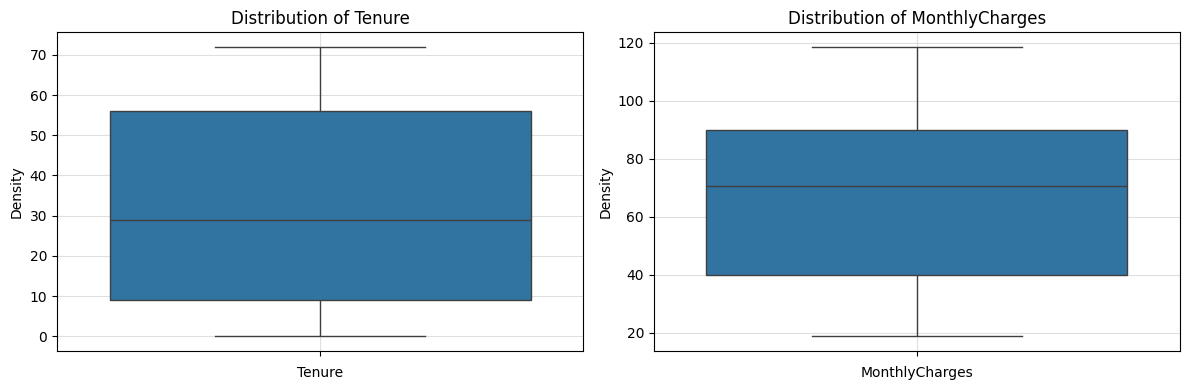

In [15]:
plt.figure(figsize=(12,4))
for i, column in enumerate(num_features, start = 1):
    sns.boxplot(num_features[column], ax=plt.subplot(1,2,i))
    plt.subplot(1,2,i).set_title(f'Distribution of {column}')
    plt.subplot(1,2,i).set_xlabel(column)
    plt.subplot(1,2,i).set_ylabel('Density')
    plt.subplot(1,2,i).grid(alpha=0.4)
plt.tight_layout()
plt.show()

No outliers among numerical variables

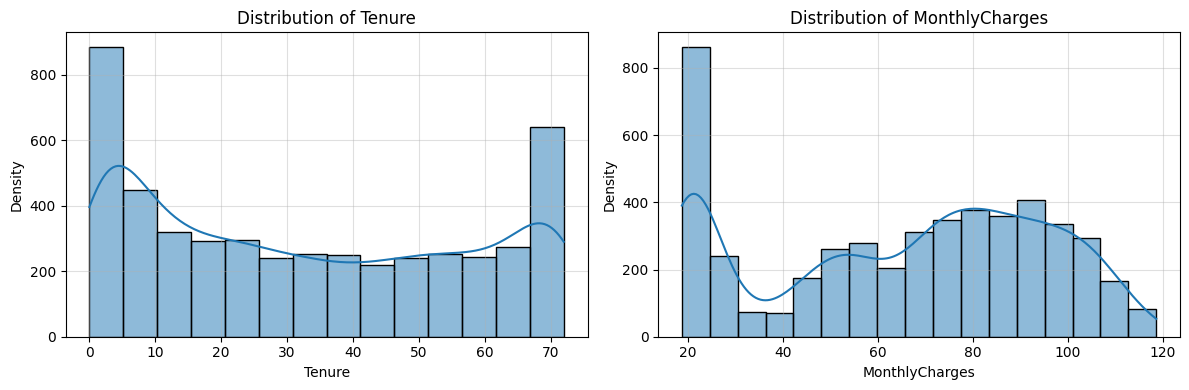

In [16]:
plt.figure(figsize=(12,4))
for i, column in enumerate(num_features, start = 1):
    sns.histplot(num_features[column], kde=True, ax=plt.subplot(1,2,i))
    plt.subplot(1,2,i).set_title(f'Distribution of {column}')
    plt.subplot(1,2,i).set_xlabel(column)
    plt.subplot(1,2,i).set_ylabel('Density')
    plt.subplot(1,2,i).grid(alpha=0.4)
plt.tight_layout()
plt.show()

None of the numerical variables are normally distributed

In [17]:
for feature in cat_features:
    print(f'Total {feature} categories: {df[feature].nunique()}')
    print(df[feature].value_counts(normalize=True))
    print()

Total Dependents categories: 2
Dependents
No     0.696476
Yes    0.303524
Name: proportion, dtype: float64

Total OnlineSecurity categories: 2
OnlineSecurity
No     0.705337
Yes    0.294663
Name: proportion, dtype: float64

Total OnlineBackup categories: 2
OnlineBackup
No     0.649289
Yes    0.350711
Name: proportion, dtype: float64

Total InternetService categories: 3
InternetService
Fiber optic    0.443849
DSL            0.349475
No             0.206676
Name: proportion, dtype: float64

Total DeviceProtection categories: 2
DeviceProtection
No     0.652174
Yes    0.347826
Name: proportion, dtype: float64

Total TechSupport categories: 2
TechSupport
No     0.70987
Yes    0.29013
Name: proportion, dtype: float64

Total Contract categories: 3
Contract
Month-to-month    0.549145
Two year          0.235524
One year          0.215331
Name: proportion, dtype: float64

Total PaperlessBilling categories: 2
PaperlessBilling
Yes    0.60272
No     0.39728
Name: proportion, dtype: float64

Total C

In [18]:
df['Churn'].value_counts().apply(lambda x: f'{x} - ({x/len(df)*100:.2f}%)')

Churn
No     3565 - (73.46%)
Yes    1288 - (26.54%)
Name: count, dtype: object

Dataset is imbalanced between churned and non churned customers, leaning towards non churned customers.

In [19]:
df.to_csv(r'..\data\interim\data_telco_customer_churn-cleaned.csv', index=False)

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [20]:
seen, unseen = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

In [21]:
seen.reset_index(drop=True, inplace=True)
unseen.reset_index(drop=True, inplace=True)

In [22]:
unseen.to_csv(r'..\data\processed\data_telco_customer_churn-unseen.csv', index=False)

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [23]:
train, test = train_test_split(seen, test_size=0.2, random_state=42, stratify=seen['Churn'])

In [24]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [25]:
train.to_csv(r'..\data\processed\data_telco_customer_churn-train.csv', index=False)

In [26]:
test.to_csv(r'..\data\processed\data_telco_customer_churn-test.csv', index=False)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Analysis 1**

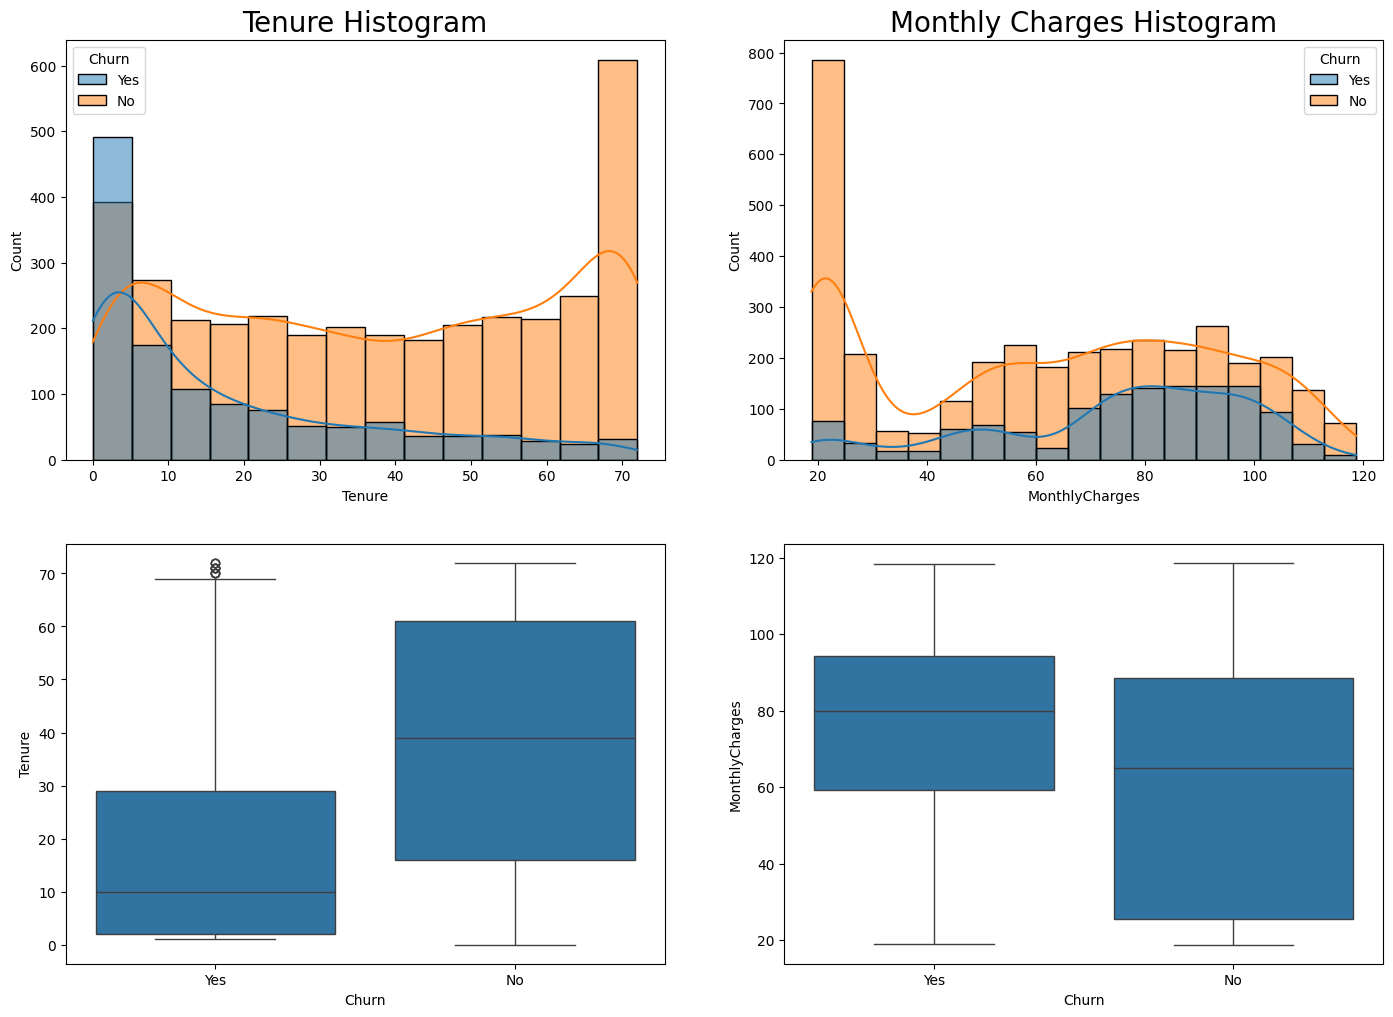

In [27]:
plt.figure(figsize=(17,12))

plt.subplot(221)
sns.histplot(data=df,x='Tenure',hue='Churn',kde=True)
plt.title('Tenure Histogram',fontsize=20)

plt.subplot(222)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True)
plt.title('Monthly Charges Histogram',fontsize=20)

plt.subplot(223)
sns.boxplot(data=df,y='Tenure', x='Churn')

plt.subplot(224)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn')
plt.show()

Based on the `Tenure` graphs, it can be inferred that the longer the tenure or the longer the customers had used our services, the less likely the customers would churn. 

While according to `MonthlyCharges` graphs, the higher the customers had paid monthly charges, the more likely the customer will churn. This may mean there were dissatisfactions with the comparison between the pricing and the services provided.

In [28]:
tenure_df = df.groupby('Tenure')['Churn'].value_counts(normalize=True).unstack()
tenure_df['count'] = df.groupby('Tenure')['Churn'].count()
display(tenure_df.sort_values(by=['Yes'], ascending=False).head(15))
display(tenure_df.sort_values(by=['Yes'], ascending=False).tail(15))

Churn,No,Yes,count
Tenure,,,
1,0.356410,0.643590,390
2,0.467532,0.532468,154
3,0.518519,0.481481,135
5,0.522727,0.477273,88
4,0.527273,0.472727,110
10,0.594937,0.405063,79
9,0.597938,0.402062,97
8,0.606742,0.393258,89
16,0.607843,0.392157,51


Churn,No,Yes,count
Tenure,,,
56,0.887097,0.112903,62
68,0.887324,0.112676,71
67,0.905405,0.094595,74
45,0.906977,0.093023,43
65,0.907407,0.092593,54
52,0.912281,0.087719,57
70,0.930556,0.069444,72
62,0.934783,0.065217,46
69,0.935484,0.064516,62


Those who have left after using the company's services for around more or less 1 year (<u>+</u>12 months) are more likely to churn than those who left after more than 2 years. However, none of the customers who left after using our services in less than 1 month churned.

**5.2 Analysis 2**

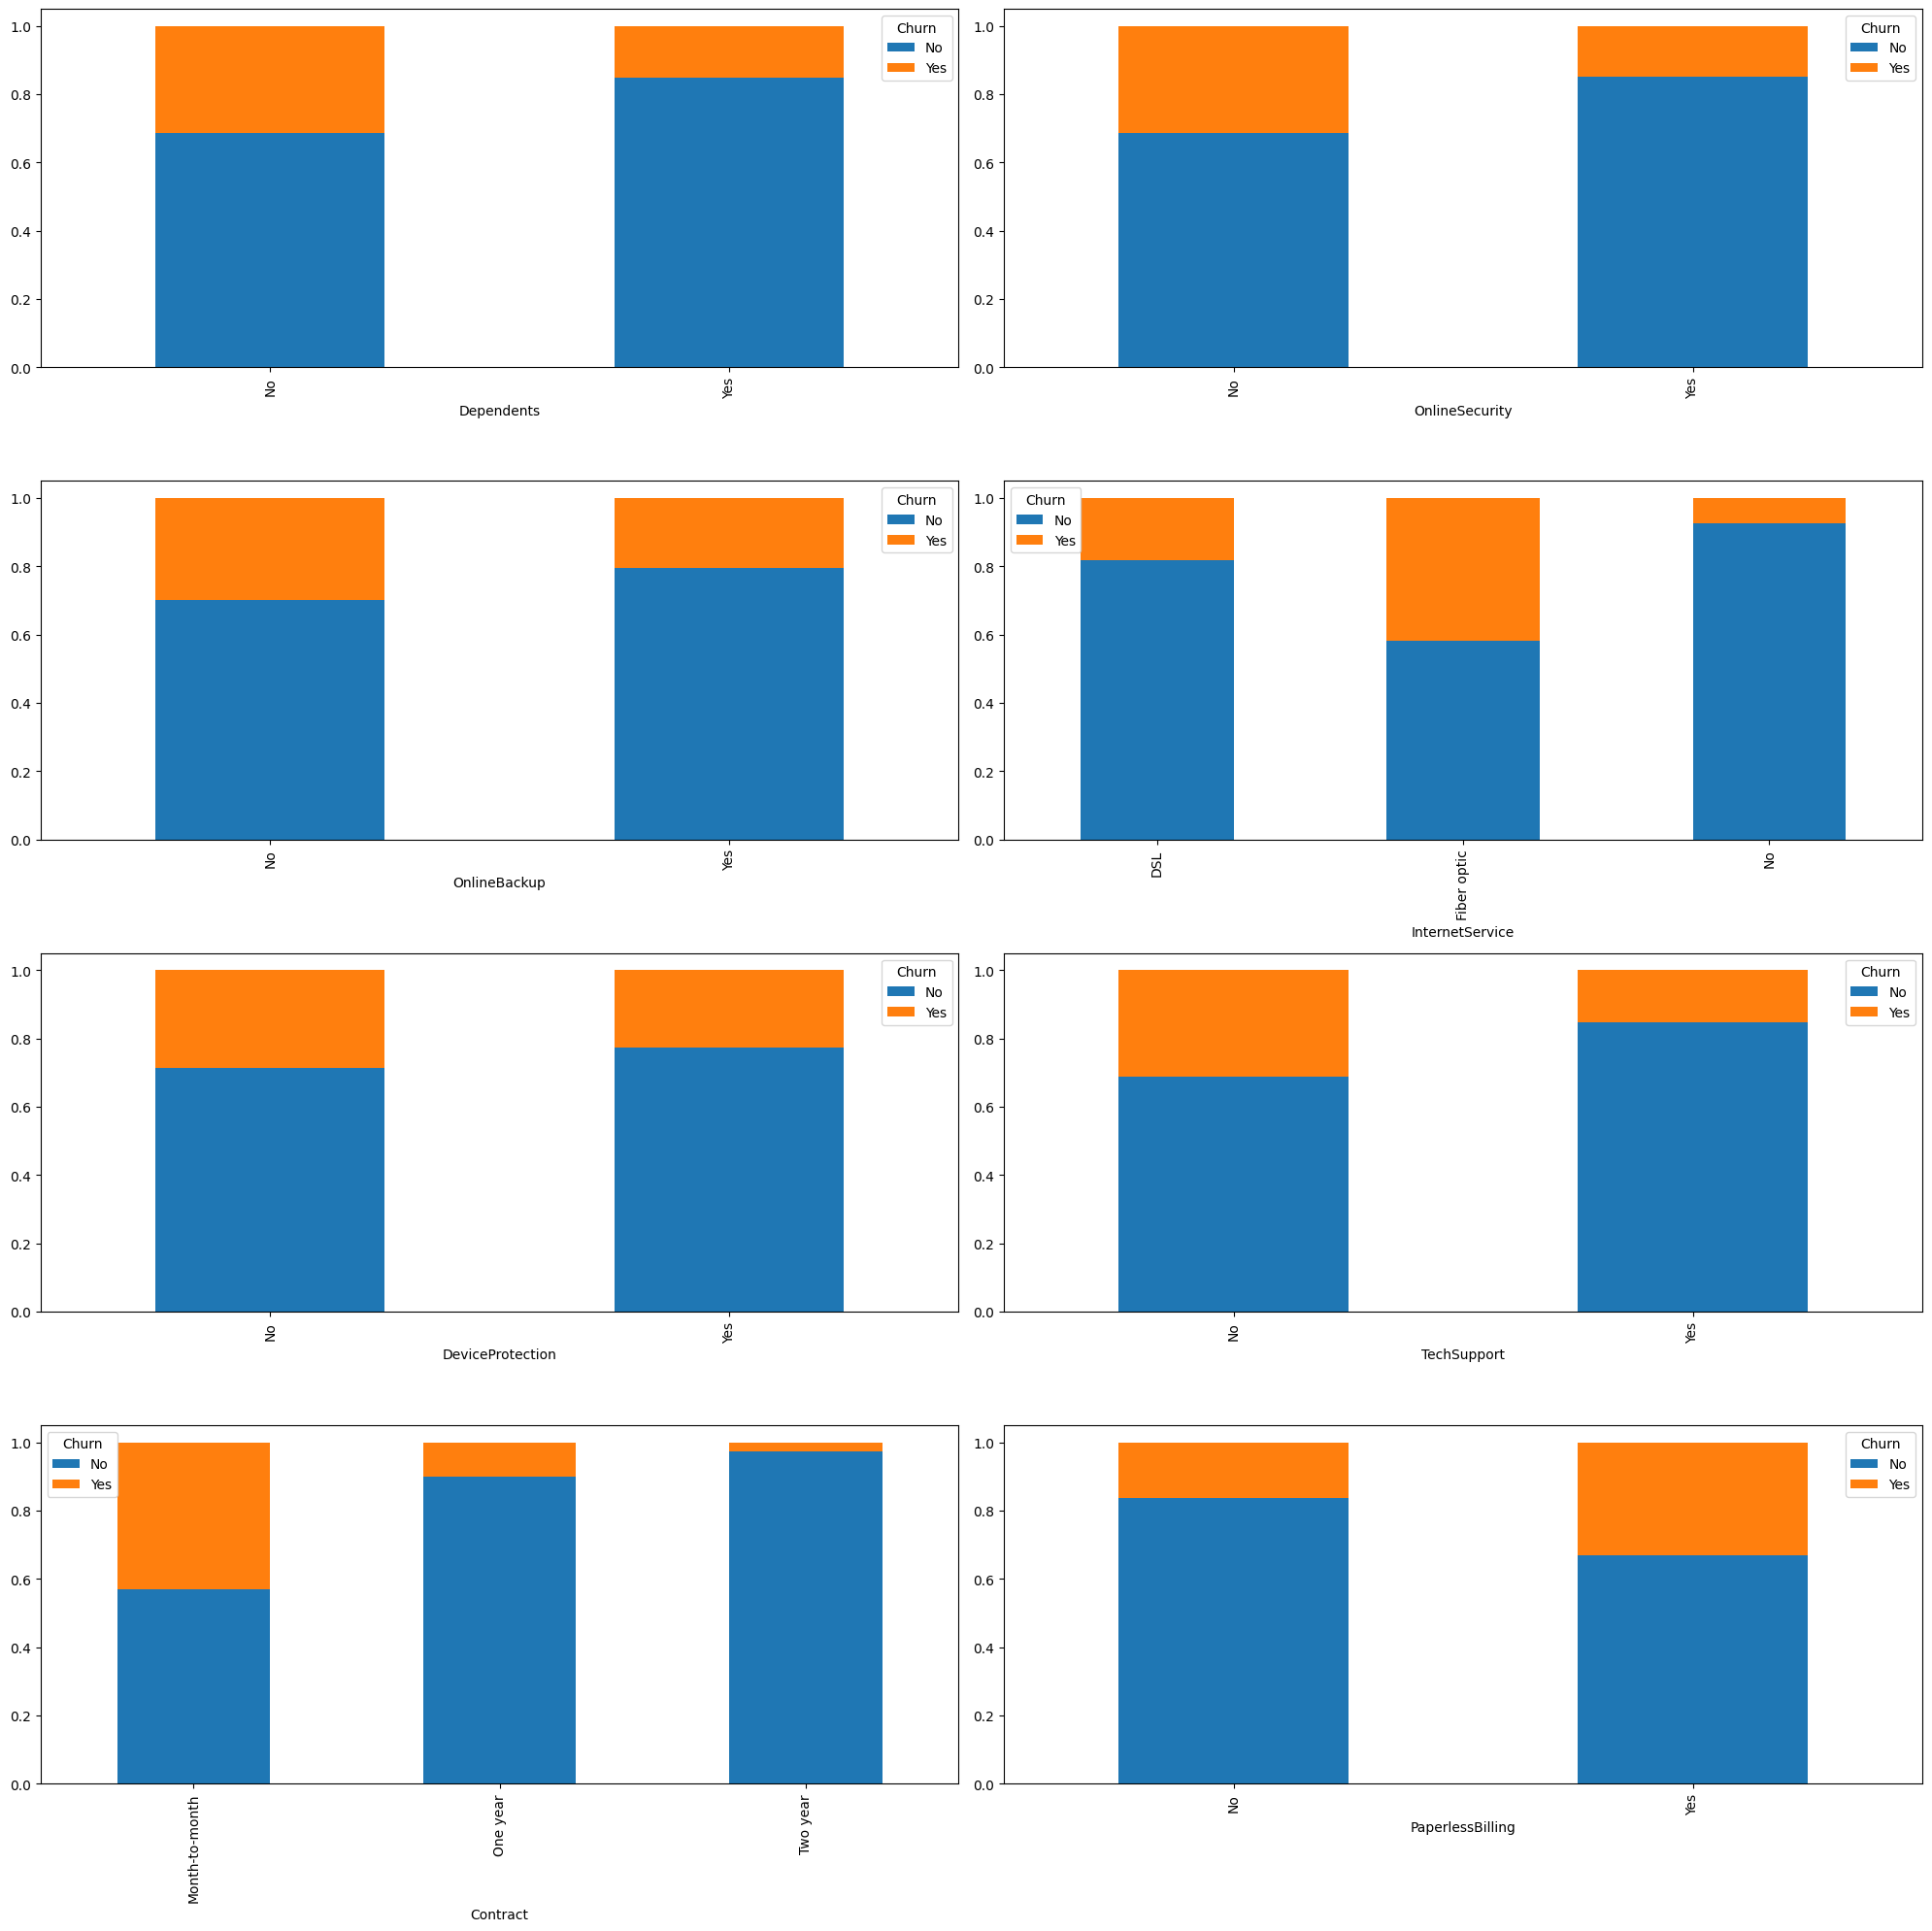

In [29]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['Churn','Tenure','MonthlyCharges']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [30]:
for i in df.drop(columns=['Churn','Tenure','MonthlyCharges']).columns:
    object_df = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(object_df.sort_values(by=['Yes'], ascending=False))

Churn,No,Yes
Dependents,,
No,0.685207,0.314793
Yes,0.847929,0.152071


Churn,No,Yes
OnlineSecurity,,
No,0.685656,0.314344
Yes,0.851748,0.148252


Churn,No,Yes
OnlineBackup,,
No,0.701999,0.298001
Yes,0.794947,0.205053


Churn,No,Yes
InternetService,,
Fiber optic,0.581244,0.418756
DSL,0.816627,0.183373
No,0.925224,0.074776


Churn,No,Yes
DeviceProtection,,
No,0.714060,0.285940
Yes,0.773104,0.226896


Churn,No,Yes
TechSupport,,
No,0.688244,0.311756
Yes,0.848011,0.151989


Churn,No,Yes
Contract,,
Month-to-month,0.568480,0.431520
One year,0.898565,0.101435
Two year,0.972003,0.027997


Churn,No,Yes
PaperlessBilling,,
Yes,0.668034,0.331966
No,0.835581,0.164419


Insights:

1. `Dependents`<br>
Those who have no dependents are more likely to churn than those who have dependents

2. `Internet Service` <br>
Customers who chose fiber optic are more likely to churn while those with no internet service is less likely to churn. This could mean that there is a problem with the fiber optic service resulting in customer churn.

3. `Online Security`, `Online Backup`, `Device Protection`, `Tech Support` <br>
These options are available for the customers who have internet service. The customers that don't have these services tend to churn more than those who does.

4. `Contract` <br>
The customers who have month-to-month contract are more likely to churn as they have shorter terms

5. `Paperless Billing` <br>
The customers who chose paperless billing are more likely to churn

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initializating functions
- Defining Feature and Target

Here we will use `OneHotEncoder` because the cardinality of each categorical variables is not high (2-3 unique values). And for the numerical features, we will use `MinMaxScaler` as there are no outliers and our numerical features are both not normally distributed.

In [31]:
ohe = OneHotEncoder(drop='first')
minmax = MinMaxScaler()

Since the goal is to predict `Churn`, this means `Churn` is the target variable, while the feature variables are the rest of the columns.

In [32]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols = cat_cols.drop('Churn')

First, the target variable `Churn` must be changed into binary values

In [33]:
train['Churn'] = np.where(train['Churn']=='Yes',1,0)
test['Churn'] = np.where(test['Churn']=='Yes',1,0)

In [34]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']
X_test = test.drop(columns='Churn')
y_test = test['Churn']

In [35]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3105, 10) (3105,) (777, 10) (777,)


**6.2 Data Transformation (Feature Engineering)**

Then we transform the features as well, using transformation method that consists of `OneHotEncoder` and `MinMaxScaler`

In [36]:
transformer = ColumnTransformer([
    ('onehot', ohe, cat_cols),
    ('scaler', minmax, num_cols)
    ], remainder='passthrough'
)

In [37]:
transformer.fit_transform(X_train)

array([[1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.65798698],
       [0.        , 0.        , 1.        , ..., 1.        , 0.15277778,
        0.21632449],
       [0.        , 0.        , 0.        , ..., 1.        , 0.01388889,
        0.01301953],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 0.22222222,
        0.35152729],
       [0.        , 0.        , 0.        , ..., 1.        , 0.04166667,
        0.56334502],
       [0.        , 0.        , 0.        , ..., 1.        , 0.40277778,
        0.06059089]])

**6.3 Overview**

In [38]:
testing = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
testing.head()

,onehot__Dependents_Yes,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_Yes,onehot__TechSupport_Yes,onehot__Contract_One year,onehot__Contract_Two year,onehot__PaperlessBilling_Yes,scaler__Tenure,scaler__MonthlyCharges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.000000,0.657987
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.152778,0.216324
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.013889,0.013020
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.010516
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.500000,0.760140


## **Section 7. Model Development**

**7.1 Initialization**
- Initializating Function
- Create Custom Metrics
- Create a workflow of the experiment

In [39]:
# Random State
rs = 42

In [40]:
# Model Functions
logreg = LogisticRegression(random_state=rs)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=rs)
rf = RandomForestClassifier(random_state=rs)
ada = AdaBoostClassifier(random_state=rs)
gb = GradientBoostingClassifier(random_state=rs)
xgb = XGBClassifier(random_state=rs)
lgbm = lgb.LGBMClassifier(random_state=rs)
svc = SVC(random_state=rs)

In [41]:
# Resamplers
ros = RandomOverSampler(random_state=rs)
rus = RandomUnderSampler(random_state=rs)
smote = SMOTE(random_state=rs)
adasyn = ADASYN(random_state=rs)
ncr = NeighbourhoodCleaningRule()
iht = InstanceHardnessThreshold(random_state=rs)

In [42]:
# f2 metric
f2 = make_scorer(fbeta_score, beta=2)

**7.2 Developing the Model Pipeline**

In [43]:
models = {
    'LogisticRegression' : logreg,
    'KNeighbors' : knn,
    'DecisionTree' : dt,
    'RandomForest' : rf,
    'AdaBoost' : ada,
    'GradientBoosting' : gb,
    'XGBClassifier' : xgb,
    'LGBMClassifier' : lgbm,
    'SVC' : svc
}

resamplers = {
    'Random Oversampling' : ros,
    'Random Undersampling' : rus,
    'SMOTE' : smote,
    'ADASYN' : adasyn,
    'Neighbourhood Cleaning Rule' : ncr,
    'IHT' : iht
}

In [44]:
# for mod in models:
#     pipe_model = Pipeline([
#         ('transformer', transformer),
#         ('model', mod)
#     ])

**7.3 Model Benchmarking (Comparing model base performance)**

-  `Cross Validation` benchmarking using `K-Fold` without resampling

In [45]:
score=[]
avg_f2=[]
std_f2=[]
avg_roc_auc=[]
std_roc_auc=[]
model_names = []

for i in models.items():
    model_name = i[0]
    model = i[1]
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',model)])
    model_cv_f2=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring=f2)
    model_cv_roc_auc=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv_f2)
    avg_f2.append(model_cv_f2.mean())
    std_f2.append(model_cv_f2.std())
    avg_roc_auc.append(model_cv_roc_auc.mean())
    std_roc_auc.append(model_cv_roc_auc.std())
    model_names.append(model_name)
    
models_train = pd.DataFrame({'Model':model_names,
                             'F2 mean cv':avg_f2,
                             'F2 sdev':std_f2,
                             'roc_auc mean':avg_roc_auc,
                             'roc_auc sdev':std_roc_auc}).set_index('Model').sort_values(by=['F2 mean cv', 'roc_auc mean'],ascending=False)
models_train

[LightGBM] [Info] Number of positive: 660, number of negative: 1824
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 2484, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265700 -> initscore=-1.016547
[LightGBM] [Info] Start training from score -1.016547
[LightGBM] [Info] Number of positive: 659, number of negative: 1825
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 2484, number of used features: 12
[LightGBM] [Info] [binary:Bo

,F2 mean cv,F2 sdev,roc_auc mean,roc_auc sdev
Model,,,,
LGBMClassifier,0.541733,0.036834,0.825214,0.012974
LogisticRegression,0.539633,0.040555,0.837578,0.021280
GradientBoosting,0.531568,0.036320,0.837970,0.016650
XGBClassifier,0.524202,0.040256,0.817094,0.017435
AdaBoost,0.519173,0.035292,0.835596,0.021270
KNeighbors,0.507851,0.032757,0.771907,0.017026
DecisionTree,0.502120,0.030460,0.656523,0.020933
RandomForest,0.484781,0.032233,0.803362,0.017868
SVC,0.476401,0.029634,0.798761,0.024810


Based on the `roc_auc` mean value, the default best model for this data is `Gradient Boosted` model. Looking at the `F2` mean values however, none of the models seem to perform well, with the highest `F2` mean value being 0.54, belonging to `LightGBM` model. 

For this classification model, we will prioritize `F2` values because the priority is for the model to be able to distinguish customers who are likely to churn from those who are not.

- Benchmarking test data without resampling

In [46]:
test_f2 = []
test_model_names = []

for mod in models.items():
    model_name = mod[0]
    model = mod[1]

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('model', model)
    ])

    # Fit model
    pipe_model.fit(X_train, y_train)
    y_pred_test = pipe_model.predict(X_test)
    f2_test = fbeta_score(y_test, y_pred_test, beta=2)

    test_model_names.append(model_name)
    test_f2.append(f2_test)

[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265378 -> initscore=-1.018199
[LightGBM] [Info] Start training from score -1.018199


In [47]:
models_test = pd.DataFrame({
    'Model':test_model_names,
    'F2 Test Score': test_f2
})

models_test.sort_values(by='F2 Test Score', ascending=False)

,Model,F2 Test Score
5,GradientBoosting,0.539715
0,LogisticRegression,0.539166
1,KNeighbors,0.535536
3,RandomForest,0.524440
4,AdaBoost,0.522541
6,XGBClassifier,0.504032
2,DecisionTree,0.503388
7,LGBMClassifier,0.491886
8,SVC,0.456453


Using the test data, `Gradient Boosted` model yields the best `f2 score`. Below is comparison of cross validations between train and test data.

In [48]:
benchmark_models = pd.merge(models_train, models_test, on='Model', suffixes=('_Train', '_Test'))
benchmark_models.sort_values(by='F2 Test Score', ascending = False)

,Model,F2 mean cv,F2 sdev,roc_auc mean,roc_auc sdev,F2 Test Score
2,GradientBoosting,0.531568,0.036320,0.837970,0.016650,0.539715
1,LogisticRegression,0.539633,0.040555,0.837578,0.021280,0.539166
5,KNeighbors,0.507851,0.032757,0.771907,0.017026,0.535536
7,RandomForest,0.484781,0.032233,0.803362,0.017868,0.524440
4,AdaBoost,0.519173,0.035292,0.835596,0.021270,0.522541
3,XGBClassifier,0.524202,0.040256,0.817094,0.017435,0.504032
6,DecisionTree,0.502120,0.030460,0.656523,0.020933,0.503388
0,LGBMClassifier,0.541733,0.036834,0.825214,0.012974,0.491886
8,SVC,0.476401,0.029634,0.798761,0.024810,0.456453


Next, because our churn data is imbalanced, we can also compare several resampling methods using oversampling, undersampling, and a combination of both. 

- `K-Fold` `Cross Validation` Benchmarking with Resampling

In [49]:
# Resampling cross validation
resampled_score = []
resampled_avg = []
resampled_std = []
resampled_names = []

for mod in models.items():
    for res in resamplers.items():
        model_name = mod[0]
        model = mod[1]

        resampler_name = res[0]
        resampler = res[1]

        pipe_model = Pipeline([
            ('transformer', transformer),
            ('resampler', resampler),
            ('model', model)
        ])

        skfold=StratifiedKFold(n_splits=5)
        model_cv = cross_val_score(
            estimator = pipe_model, 
            X= X_train,
            y= y_train, 
            cv=skfold, 
            scoring=f2, 
            error_score='raise'
            )

        res_name = f'{model_name} - {resampler_name}'
        resampled_score.append(model_cv.round(4))
        resampled_avg.append(model_cv.mean())
        resampled_std.append(model_cv.std())
        resampled_names.append(res_name)

[LightGBM] [Info] Number of positive: 1824, number of negative: 1824
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 3648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1825, number of negative: 1825
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 3650, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

In [50]:
pd.set_option('display.max_colwidth', 1)

resampled_train_cv = pd.DataFrame({
    'Model': resampled_names,
    'F2 Mean CV': resampled_avg,
    'Std': resampled_std
})

resampled_train_cv.sort_values(by='F2 Mean CV', ascending = False).head()


,Model,F2 Mean CV,Std
35,GradientBoosting - IHT,0.741012,0.020498
29,AdaBoost - IHT,0.740976,0.018004
5,LogisticRegression - IHT,0.739684,0.016789
23,RandomForest - IHT,0.738854,0.018291
53,SVC - IHT,0.738136,0.017134


From the cross validation results after resampling, the top performing models are the ones that use the IHT resampling method. We will compare the results with the train and test data.

- Benchmarking training and testing data with resampling

A. Training Data

In [51]:
resampled_names = []
resampled_f2_train = []

for mod in models.items():
    for res in resamplers.items():
        model_name = mod[0]
        model = mod[1]

        resampler_name = res[0]
        resampler = res[1]

        res_name = f'{model_name} - {resampler_name}'
        
        # Model pipeline
        pipe_model = Pipeline([
            ('transformer', transformer),
            ('resampler', resampler),
            ('model', model)
        ])

        # Fit model
        pipe_model.fit(X_train, y_train)
        
        # Predict
        y_pred_train = pipe_model.predict(X_train)

        # Evaluate Model
        f2_test = fbeta_score(y_train, y_pred_train, beta=2)

        resampled_names.append(res_name)
        resampled_f2_train.append(f2_test)


[LightGBM] [Info] Number of positive: 2281, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 4562, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 824, number of negative: 824
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

In [52]:
resampled_train = pd.DataFrame({
    'Model' : resampled_names, 
    'F2 Score Train' : resampled_f2_train,
})

print("Train score result")

resampled_train.sort_values(by='F2 Score Train', ascending = False).head()


Train score result


,Model,F2 Score Train
18,RandomForest - Random Oversampling,0.997579
12,DecisionTree - Random Oversampling,0.996851
20,RandomForest - SMOTE,0.996851
21,RandomForest - ADASYN,0.996122
15,DecisionTree - ADASYN,0.990268


B. Testing Data

In [53]:
resampled_names = []
resampled_f2_test = []
resampled_recall_test = []
resampled_roc_auc_test = []
resampled_precision_test = []
resampled_accuracy_test = []

for mod in models.items():
    for res in resamplers.items():
        model_name = mod[0]
        model = mod[1]

        resampler_name = res[0]
        resampler = res[1]

        res_name = f'{model_name} - {resampler_name}'

        # Model pipeline
        pipe_model = Pipeline([
            ('transformer', transformer),
            ('resampler', resampler),
            ('model', model)
        ])

        # Fit model
        pipe_model.fit(X_train, y_train)

        y_pred_test = pipe_model.predict(X_test)

        # Use predict_proba if available, otherwise decision_function
        if hasattr(pipe_model, 'predict_proba'):
            y_pred_proba_test = pipe_model.predict_proba(X_test)[:, 1]
        elif hasattr(pipe_model, 'decision_function'):
            y_pred_proba_test = pipe_model.decision_function(X_test)
        else:
            raise AttributeError("This model does not support probability prediction or decision scores.")

        # Evaluate Model
        f2_test = fbeta_score(y_test, y_pred_test, beta=2)
        recall_test = recall_score(y_test, y_pred_test)
        roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)
        precision_test = precision_score(y_test, y_pred_test)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        # Append values to lists
        resampled_names.append(res_name)
        resampled_f2_test.append(f2_test)
        resampled_recall_test.append(recall_test)
        resampled_roc_auc_test.append(roc_auc_test)
        resampled_precision_test.append(precision_test)
        resampled_accuracy_test.append(accuracy_test)


[LightGBM] [Info] Number of positive: 2281, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 4562, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 824, number of negative: 824
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 1648, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

In [54]:
resampled_test = pd.DataFrame({
    'Model' : resampled_names, 
    'F2 Test' : resampled_f2_test,
    'Recall Test' : resampled_recall_test,
    'ROC AUC Test' : resampled_roc_auc_test,
    'Precision Test' : resampled_precision_test,
    'Accuracy Test' : resampled_accuracy_test
})

resampled_test.sort_values(by=['F2 Test','ROC AUC Test'], ascending = False)

,Model,F2 Test,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
5,LogisticRegression - IHT,0.758052,0.936893,0.850428,0.429844,0.653797
35,GradientBoosting - IHT,0.750000,0.932039,0.836010,0.421053,0.642214
53,SVC - IHT,0.747082,0.932039,0.842650,0.416486,0.635779
23,RandomForest - IHT,0.743610,0.932039,0.838994,0.411135,0.628057
29,AdaBoost - IHT,0.742879,0.936893,0.839462,0.406316,0.620335
41,XGBClassifier - IHT,0.742036,0.927184,0.831002,0.412527,0.630631
47,LGBMClassifier - IHT,0.739875,0.922330,0.833302,0.413043,0.631918
11,KNeighbors - IHT,0.736315,0.927184,0.787896,0.403805,0.617761
28,AdaBoost - Neighbourhood Cleaning Rule,0.729991,0.805825,0.847606,0.530351,0.759331
46,LGBMClassifier - Neighbourhood Cleaning Rule,0.728799,0.800971,0.847334,0.535714,0.763192


- The result of the models' performance on the test data with resampling shows higher F2 score than without resampling. This means resampling is effective in improving our model's performance.
- There are many models with F2 score above 0.7, so we will limit our model candidates to those models.
- Recall score, while not our primary metric, is still closely related to the F2 score, so it will be considered when choosing our final model. - There is high variance in recall score ranging from around 0.4 to 0.9. As recall is also an important metric to minimize false negatives, we want a higher score for recall so we will limit to models that scored above 0.8.
- The ROC AUC score shows how well our models' performance is at distinguishing the different classes. Most of the models scored above 0.8 so we will remove those that scored below it.

In [55]:
model_result = pd.merge(resampled_train_cv, resampled_train).merge(resampled_test)

model_result.sort_values(by='F2 Test', ascending = False).head()

,Model,F2 Mean CV,Std,F2 Score Train,F2 Test,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
5,LogisticRegression - IHT,0.739684,0.016789,0.747182,0.758052,0.936893,0.850428,0.429844,0.653797
35,GradientBoosting - IHT,0.741012,0.020498,0.762107,0.750000,0.932039,0.836010,0.421053,0.642214
53,SVC - IHT,0.738136,0.017134,0.747637,0.747082,0.932039,0.842650,0.416486,0.635779
23,RandomForest - IHT,0.738854,0.018291,0.788668,0.743610,0.932039,0.838994,0.411135,0.628057
29,AdaBoost - IHT,0.740976,0.018004,0.753187,0.742879,0.936893,0.839462,0.406316,0.620335


In [56]:
model_result = model_result[(model_result['F2 Test'] >= 0.7) & (model_result['Recall Test'] >= 0.8) & (model_result['ROC AUC Test'] >= 0.8)]
model_result.shape

(12, 9)

After removing models with low F2, Recall, and ROC AUC scores on the test data, we will choose the best performing models to compare by performing hyperparameter tuning before choosing our final model. We will compare the stability of the F2 Score from cross validation, training set, and test set. We will see if any model performs better on test set and also look at the values of the other metrics.

In [57]:
model_result['diff'] = abs(model_result['F2 Test'] - model_result['F2 Score Train'])
diff = model_result.pop('diff')
model_result.insert(5, 'Difference', diff)

In [58]:
model_result

,Model,F2 Mean CV,Std,F2 Score Train,F2 Test,Difference,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
3,LogisticRegression - ADASYN,0.720647,0.028283,0.726750,0.726016,0.000735,0.815534,0.849918,0.504505,0.738739
5,LogisticRegression - IHT,0.739684,0.016789,0.747182,0.758052,0.010870,0.936893,0.850428,0.429844,0.653797
23,RandomForest - IHT,0.738854,0.018291,0.788668,0.743610,0.045058,0.932039,0.838994,0.411135,0.628057
27,AdaBoost - ADASYN,0.714928,0.041040,0.734694,0.726872,0.007822,0.800971,0.851274,0.530547,0.759331
28,AdaBoost - Neighbourhood Cleaning Rule,0.717256,0.033127,0.728441,0.729991,0.001550,0.805825,0.847606,0.530351,0.759331
29,AdaBoost - IHT,0.740976,0.018004,0.753187,0.742879,0.010307,0.936893,0.839462,0.406316,0.620335
35,GradientBoosting - IHT,0.741012,0.020498,0.762107,0.750000,0.012107,0.932039,0.836010,0.421053,0.642214
41,XGBClassifier - IHT,0.736263,0.014234,0.792460,0.742036,0.050424,0.927184,0.831002,0.412527,0.630631
46,LGBMClassifier - Neighbourhood Cleaning Rule,0.703393,0.024667,0.857019,0.728799,0.128220,0.800971,0.847334,0.535714,0.763192
47,LGBMClassifier - IHT,0.735036,0.013632,0.793223,0.739875,0.053348,0.922330,0.833302,0.413043,0.631918


After calculating the difference between our train and test scores, we will further filter our models so only models with a difference of 0.05 or less are selected.

In [59]:
model_result = model_result[(model_result['Difference'] < 0.05)]

In [60]:
model_result.sort_values(by='F2 Test', ascending=False)

,Model,F2 Mean CV,Std,F2 Score Train,F2 Test,Difference,Recall Test,ROC AUC Test,Precision Test,Accuracy Test
5,LogisticRegression - IHT,0.739684,0.016789,0.747182,0.758052,0.010870,0.936893,0.850428,0.429844,0.653797
35,GradientBoosting - IHT,0.741012,0.020498,0.762107,0.750000,0.012107,0.932039,0.836010,0.421053,0.642214
53,SVC - IHT,0.738136,0.017134,0.747637,0.747082,0.000555,0.932039,0.842650,0.416486,0.635779
23,RandomForest - IHT,0.738854,0.018291,0.788668,0.743610,0.045058,0.932039,0.838994,0.411135,0.628057
29,AdaBoost - IHT,0.740976,0.018004,0.753187,0.742879,0.010307,0.936893,0.839462,0.406316,0.620335
28,AdaBoost - Neighbourhood Cleaning Rule,0.717256,0.033127,0.728441,0.729991,0.001550,0.805825,0.847606,0.530351,0.759331
27,AdaBoost - ADASYN,0.714928,0.041040,0.734694,0.726872,0.007822,0.800971,0.851274,0.530547,0.759331
3,LogisticRegression - ADASYN,0.720647,0.028283,0.726750,0.726016,0.000735,0.815534,0.849918,0.504505,0.738739
51,SVC - ADASYN,0.712283,0.018162,0.761715,0.716123,0.045591,0.810680,0.826233,0.488304,0.724582


First, we sort the models based on the lowest standard deviation of the cross validation models to see how stable the models were during the process. Next, we want to look at how the `F2` score differs between the cross-validation set, train set, and test sets. The difference calculated is the `F2` score for the train and test set. The top 3 models based on the standard deviation have stable score across the different sets. They also have high `Recall` and `ROC AUC` score meaning the models are able to minimize False Negatives and also have great performance to differentiate the classes.

Chosen Models

1. Logistic Regression with IHT<br>
Standard Deviation of Cross Validation below 0.02<br>
Increased F2 score after testing (+ 0.01)<br>
High recall = 0.93<br>
ROC AUC = 0.85

2. GradientBoost with IHT<br>
Standard Deviation of Cross Validation slightly above 0.02 <br>
Slight decrease in F2 score after testing (- 0.01)<br>
High recall = 0.93<br>
ROC AUC = 0.84

3. SVC with IHT<br>
Standard Deviation of Cross Validation below 0.02<br>
Very slight decrease in F2 score after testing (- 0.00)<br>
High recall = 0.93<br>
ROC AUC = 0.84

**7.4 Tune Model**

A. Logistic Regression Hyperparameter Tuning

For logistic regression model, the parameter grid contains the following:

1. `penalty`

Specifies the type of regularization to use:

`l1`: Lasso regression (feature selection).<br>
`l2`: Ridge regression.<br>
`elasticnet`: Combination of Lasso and Ridge.<br>
`None`: No regularization.

2. `C`

Controls the strength of regularization. Requires positive float.
Smaller values of `C` indicate stronger regularization, while larger values indicate the opposite. The default value is 1.0.

3. `solver`

Algorithm used in the optimization problem

4. `max_iter`

Maximum number of iterations taken for the solvers to converge. Default is 100

- Hyperparameter Tuning

In [61]:
rs_tuning = 42

Model performance before tuning

In [62]:
logreg_iht = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', logreg)
        ])

# Fitting
logreg_iht.fit(X_train, y_train)

# Predict
y_pred_logregiht = logreg_iht.predict(X_test)

f2_score_logregiht = fbeta_score(y_test, y_pred_logregiht, beta = 2)

print(f'F2 Score before tuning: {f2_score_logregiht:.4f}')


F2 Score before tuning: 0.7581


In [63]:
print('Performance before tuning:')
print(classification_report(y_test, y_pred_logregiht))

Performance before tuning:
              precision    recall  f1-score   support

           0       0.96      0.55      0.70       571
           1       0.43      0.94      0.59       206

    accuracy                           0.65       777
   macro avg       0.70      0.74      0.65       777
weighted avg       0.82      0.65      0.67       777



Model Performance after tuning

In [64]:
# Penalty
penalty = ['l1', 'l2']

# C
c = [0.5,1]

# Solver
solver = ['saga', 'lbfgs']

# Max iterations
max_iter = [50,100]

# Parameter grid
hyperparam_space_logreg = {
    'model__penalty': penalty,
    'model__C'  : c,
    'model__solver' : solver,
    'model__max_iter' : max_iter
}

In [65]:
logreg_iht_pipe = Pipeline([
    ('prep', transformer), 
    ('resample', iht),
    ('model', logreg)
])

# Import K-fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Hyperparameter Tuning
grid_logreg_iht = GridSearchCV(
    estimator = logreg_iht_pipe,
    param_grid= hyperparam_space_logreg,
    scoring = f2,
    cv = skfold,
    n_jobs = -1,
    # random_state=rs_tuning
)

grid_logreg_iht.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')...
                                                                         Index(['Tenure', 'MonthlyCharges'], dtype='object'))])),
                                       ('resample',
                                        InstanceHardnessThreshold(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.5, 1], 'model__max_iter': [50, 100],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['saga', 'lbfgs']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [66]:
# Best train score
f2_train_logregiht = grid_logreg_iht.best_score_

# Best score
print(f'F2 Score on Train Set: {f2_train_logregiht:.4f}')

# Best parameter
print(f'Best Parameter: {grid_logreg_iht.best_params_}')

F2 Score on Train Set: 0.7393
Best Parameter: {'model__C': 0.5, 'model__max_iter': 50, 'model__penalty': 'l1', 'model__solver': 'saga'}


Model performance after tuning on test data

In [67]:
# Model after hyperparameter tuning
logreg_iht_tuned = grid_logreg_iht.best_estimator_
logreg_iht_tuned.fit(X_train, y_train)

# Predict 
y_test_logregiht = logreg_iht_tuned.predict(X_test)

# Evaluate f2 score 
f2_logregiht_tuned = fbeta_score(y_test, y_test_logregiht, beta=2)

print(f'F2 Score on Test Set: {f2_logregiht_tuned:.4f}')

F2 Score on Test Set: 0.7611


In [68]:
print(classification_report(y_test, y_test_logregiht))

              precision    recall  f1-score   support

           0       0.97      0.54      0.69       571
           1       0.43      0.95      0.59       206

    accuracy                           0.65       777
   macro avg       0.70      0.74      0.64       777
weighted avg       0.82      0.65      0.67       777



B. Gradient Boosted Model Hyperparameter Tuning

For the GradientBoosting model, there are 2 types of parameters that can be tuned. One type is tree specific parameters that affect each individual tree in the model. The other type is boosting specific parameters that affect the boosting operation in the model.

**Boosting**

`learning_rate`

Learning rate controls the impact of each weak learners by adjusting the shrinkage. Lower values (closer to 0) reduce the contribution of weak learner, but in turn the strong learner will be better, reducing ovefitting.

`n_estimators`

Number of boosting stages to perform or trees to build.

`subsample`

The fraction of samples to be used for fitting the individual base learners

**Tree-specific**

`min_samples_split`

Minimum number of samples to split an internal mode

`min_samples_leaf`

Minimum number of samples required to be at leaf node

`max_depth` 

Maximum depth of a tree

`max_features`

Number of features to consider while searching for a best split.

Model Performance before Tuning

In [69]:
gb_iht = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', gb)
        ])

# Fitting
gb_iht.fit(X_train, y_train)

# Predict
y_pred_gb = gb_iht.predict(X_test)

f2_score_gb = fbeta_score(y_test, y_pred_gb, beta = 2)

print(f'F2 Score: {f2_score_gb:.4f}')

F2 Score: 0.7500


In [70]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69       571
           1       0.42      0.93      0.58       206

    accuracy                           0.64       777
   macro avg       0.69      0.73      0.63       777
weighted avg       0.81      0.64      0.66       777



Model Performance after Tuning

In [71]:
# Boosting parameters
# Learning rate
learning_rate = [0.01, 0.1]

# Number of weak learners (trees)
n_estimators = [50, 100]

# Subsample
subsample = [0.5, 0.8]

# Tree specific parameters
# Min samples split
min_samples_split = [2, 5]

# Min samples leaf
min_samples_leaf = [10,20]

# Max depth
max_depth = [10,20]

# Max features
max_features = [None, 'auto']

# Parameter grid
hyperparam_space_gb = {
    'model__learning_rate' : learning_rate,
    'model__n_estimators' : n_estimators,
    'model__subsample' : subsample,
    'model__min_samples_split' : min_samples_split,
    'model__min_samples_leaf' : min_samples_leaf,
    'model__max_depth' : max_depth,
    'model__max_features' : max_features
}

In [72]:
# Model pipeline
gb_iht_pipe = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', gb)
        ])

# Import K-fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Hyperparameter Tuning
grid_gb = GridSearchCV(
    estimator = gb_iht_pipe,
    param_grid = hyperparam_space_gb,
    scoring = f2,
    cv = skfold,
    n_jobs = -1,
    # random_state=rs_tuning
)

grid_gb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')...
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [10, 20],
                         'model__max_features': [None, 'auto'],
                         'model__min_samples_leaf': [10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [50, 100],
                         'model__subsample': [0.5, 0.8]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [73]:
# Best train score
f2_train_gbiht = grid_gb.best_score_

# Best score
print(f'F2 Score on Train Set: {f2_train_gbiht:.4f}')

# Best parameter
print(f'Best Parameter: {grid_gb.best_params_}')

F2 Score on Train Set: 0.7486
Best Parameter: {'model__learning_rate': 0.01, 'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_leaf': 10, 'model__min_samples_split': 2, 'model__n_estimators': 50, 'model__subsample': 0.5}


Model performance after tuning on test data

In [74]:
gb_iht_tuned = grid_gb.best_estimator_
gb_iht_tuned.fit(X_train, y_train)

# Predict 
y_test_gbiht = gb_iht_tuned.predict(X_test)

# Evaluate f2 score
f2_gbiht_tuned = fbeta_score(y_test, y_test_gbiht, beta=2)

print(f'F2 Score on Test Set: {f2_gbiht_tuned:.4f}')

F2 Score on Test Set: 0.7514


In [75]:
print(classification_report(y_test, y_test_gbiht))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70       571
           1       0.43      0.93      0.58       206

    accuracy                           0.65       777
   macro avg       0.69      0.74      0.64       777
weighted avg       0.81      0.65      0.67       777



C. SVC Hyperparameter Tuning

With `SVC` model, the following parameters can be considered for tuning:

1. `C` (Regularization Parameter): Controls the trade-off between achieving a low training error and a low testing error (generalization). A smaller C value creates a larger margin but allows some misclassifications, while a larger C value aims to classify all training examples correctly.

2. `Kernel`: Determines the type of hyperplane used to separate the data:
  - `linear`: Linear kernel.
  - `poly`: Polynomial kernel.
  - `rbf`: Radial basis function (Gaussian) kernel.
  - `sigmoid`: Sigmoid kernel.

3. `Gamma (Kernel Coefficient)`: Defines how far the influence of a single training example reaches. Only applicable for `rbf`, `poly`, and `sigmoid` kernels.

4. `Degree (Kernel Degree)`: Degree of the polynomial kernel function (poly). Ignored by other kernels.

5. `Coef0`: Independent term in kernel function. It is significant in `poly` and `sigmoid` kernels.

6. `Class Weight`: Adjusts the importance of different classes in imbalanced datasets. It can be set to None, balanced, or a dictionary specifying class weights.

7. `Max iter`: Maximum number of iterations taken for the solvers to converge. Default is 100


Model performance before tuning

In [76]:
svc_iht = Pipeline([
            ('prep', transformer), 
            ('resample', iht),
            ('model', svc)
        ])

# Fitting
svc_iht.fit(X_train, y_train)

# Predict
y_pred_svc = svc_iht.predict(X_test)

f2_score_svc = fbeta_score(y_test, y_pred_svc, beta = 2)

print(f'F2 Score: {f2_score_svc:.4f}')

F2 Score: 0.7471


In [77]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68       571
           1       0.42      0.93      0.58       206

    accuracy                           0.64       777
   macro avg       0.69      0.73      0.63       777
weighted avg       0.81      0.64      0.65       777



Model Performance after tuning

In [78]:
c = [0.1, 1]

kernel = ['poly', 'rbf']

gamma = ['scale', 'auto']

degree = [2,3]

coef0 = [0,0.5]

class_weight = ['balanced', None]

max_iter = [-1,150]

# Parameter grid
hyperparam_space_svc = {
    'model__C'  : c,
    'model__kernel': kernel,
    'model__gamma' : gamma,
    'model__degree': degree,
    'model__coef0': coef0,
    'model__class_weight': class_weight,
    'model__max_iter' : max_iter
}

In [79]:
svc_iht_pipe = Pipeline([
    ('prep', transformer), 
    ('resample', iht),
    ('model', svc)
])

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=rs)

# Hyperparameter Tuning
grid_svc_iht = GridSearchCV(
    estimator = svc_iht_pipe,
    param_grid= hyperparam_space_svc,
    scoring = f2,
    cv = skfold,
    n_jobs = -1,
    # random_state=rs_tuning
)

grid_svc_iht.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')...
                                        InstanceHardnessThreshold(random_state=42)),
                                       ('model', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1],
                         'model__class_weight': ['balanced', None],
                         'model__coef0': [0, 0.5], 'model__degree': [2, 3],
                         'model__gamma': ['scale', 'auto'],
                         'model__kernel': ['poly', 'rbf'],
                         'model__max_iter': [-1, 150]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [80]:
# Best train score
f2_train_svciht = grid_svc_iht.best_score_

# Best score
print(f'F2 Score on Train Set: {f2_train_svciht:.4f}')

# Best parameter
print(f'Best Parameter: {grid_svc_iht.best_params_}')

F2 Score on Train Set: 0.7437
Best Parameter: {'model__C': 0.1, 'model__class_weight': 'balanced', 'model__coef0': 0, 'model__degree': 2, 'model__gamma': 'auto', 'model__kernel': 'poly', 'model__max_iter': -1}


Model performance after tuning on test data

In [81]:
svc_iht_tuned = grid_svc_iht.best_estimator_
svc_iht_tuned.fit(X_train, y_train)

# Predict 
y_test_svciht = svc_iht_tuned.predict(X_test)

# Evaluate f2 score
f2_svciht_tuned = fbeta_score(y_test, y_test_svciht, beta=2)

print(f'F2 Score on Test Set: {f2_svciht_tuned:.4f}')

F2 Score on Test Set: 0.7578


Model Hyperparameter Tuning Comparison

In [82]:
tuned_models = ['LogisticRegression-IHT', 'GradientBoost-IHT', 'SVC-IHT']
f2_before_tuned = [f2_score_logregiht, f2_score_gb, f2_score_svc]
f2_train_tuned = [f2_train_logregiht, f2_train_gbiht, f2_train_svciht]
f2_test_tuned = [f2_logregiht_tuned, f2_gbiht_tuned, f2_svciht_tuned]

benchmark_tuned = pd.DataFrame({
    'Model' : tuned_models,
    'F2 Test Before Tuning' : f2_before_tuned,
    'F2 Train After Tuning' : f2_train_tuned,
    'F2 Test After Tuning' : f2_test_tuned
})

benchmark_tuned

,Model,F2 Test Before Tuning,F2 Train After Tuning,F2 Test After Tuning
0,LogisticRegression-IHT,0.758052,0.739330,0.761124
1,GradientBoost-IHT,0.750000,0.748609,0.751377
2,SVC-IHT,0.747082,0.743702,0.757812


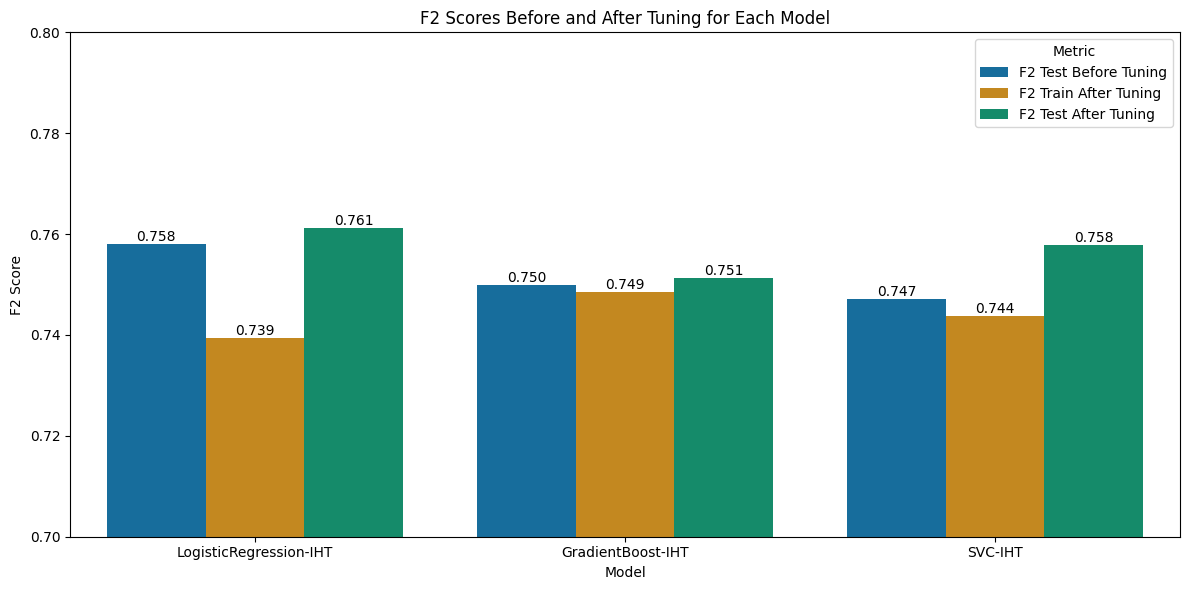

In [83]:
benchmark_melted = benchmark_tuned.melt(id_vars='Model', 
                                         value_vars=['F2 Test Before Tuning', 'F2 Train After Tuning', 'F2 Test After Tuning'],
                                         var_name='Metric', 
                                         value_name='Score')


plt.figure(figsize=(12, 6))
ax = sns.barplot(data=benchmark_melted, x='Model', y='Score', hue='Metric', palette='colorblind')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='{:.3f}')

plt.title('F2 Scores Before and After Tuning for Each Model')
plt.xlabel('Model')
plt.ylabel('F2 Score')
plt.ylim(0.7, 0.8)

plt.tight_layout()
plt.show()

**Insights**

1. There is an increase in test score after hyperparameter tuning for each model.
1. When performing hyperparameter tuning, all models show higher F2 score on test data compared to train data which indicates our models are not overfitting.
1. The best model with the highest F2 score is Logistic Regression, with a score of 0.763 after tuning. Therefore, we will choose this model as our best model.

In [84]:
# Saving model
best_model = logreg_iht_tuned
best_model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Dependents', 'OnlineSecurity', 'OnlineBackup', 'InternetService',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling'],
      dtype='object')),
                                                 ('scaler', MinMaxScaler(),
                                                  Index(['Tenure', 'MonthlyCharges'], dtype='object'))])),
                ('resample', InstanceHardnessThreshold(random_state=42)),
                ('model',
                 LogisticRegression(C=0.5, max_iter=50, penalty='l1',
                                    random_state=42, solver='saga'))])

In [101]:
# Saving model
pickle.dump(best_model, open(r'..\assets\logreg_iht_761.pkl', 'wb'))

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

Best Model: Logistic Regression with Instance Hardness Threshold and Hyperparameter Tuning

In [86]:
def classification_metrics(y_test, y_pred, y_pred_proba):
    f2_test = fbeta_score(y_test, y_pred, beta=2)
    recall_test = recall_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred_proba)

    return f2_test, recall_test, roc_auc_test

In [87]:
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

f2_test, recall_test, roc_auc_test = classification_metrics(y_test, y_pred_best, y_pred_proba_best)

print('F2 Score:', f2_test)
print('Recall Score:', recall_test)
print('ROC AUC Score:', roc_auc_test)
print(classification_report(y_test, y_pred_best))


F2 Score: 0.7611241217798594
Recall Score: 0.9466019417475728
ROC AUC Score: 0.8501649295223845
              precision    recall  f1-score   support

           0       0.97      0.54      0.69       571
           1       0.43      0.95      0.59       206

    accuracy                           0.65       777
   macro avg       0.70      0.74      0.64       777
weighted avg       0.82      0.65      0.67       777



Insights:

- F2 Score of 76.29 shows that our model performs well in minimizing the False Negatives, which is corroborated by the high Recall score of 95.
- The ROC AUC score is 0.85, meaning our model does well to distinguish between positive and negative classes.

**7.6 Model Calibration**

In [88]:
best_model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

list_threshold = np.arange(0.01, 1.00, 0.01)
score_list = []

for threshold in list_threshold:
    # Predict
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]       
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)      

    # F2 score
    score_list.append(fbeta_score(y_test, y_pred_class, beta=2)) 

In [89]:
threshold_df = pd.DataFrame({
    'Threshold' : list_threshold,
    'F2 Score' : score_list
})

In [90]:
threshold_df.sort_values(by='F2 Score', ascending = False).head(10)

,Threshold,F2 Score
48,0.49,0.763240
53,0.54,0.762846
44,0.45,0.761794
52,0.53,0.761642
47,0.48,0.761461
49,0.50,0.761124
46,0.47,0.760279
50,0.51,0.760188
43,0.44,0.760031
45,0.46,0.759101


From the process of finding the optimized threshold, the best threshold is **0.49**.

- Confusion Matrix

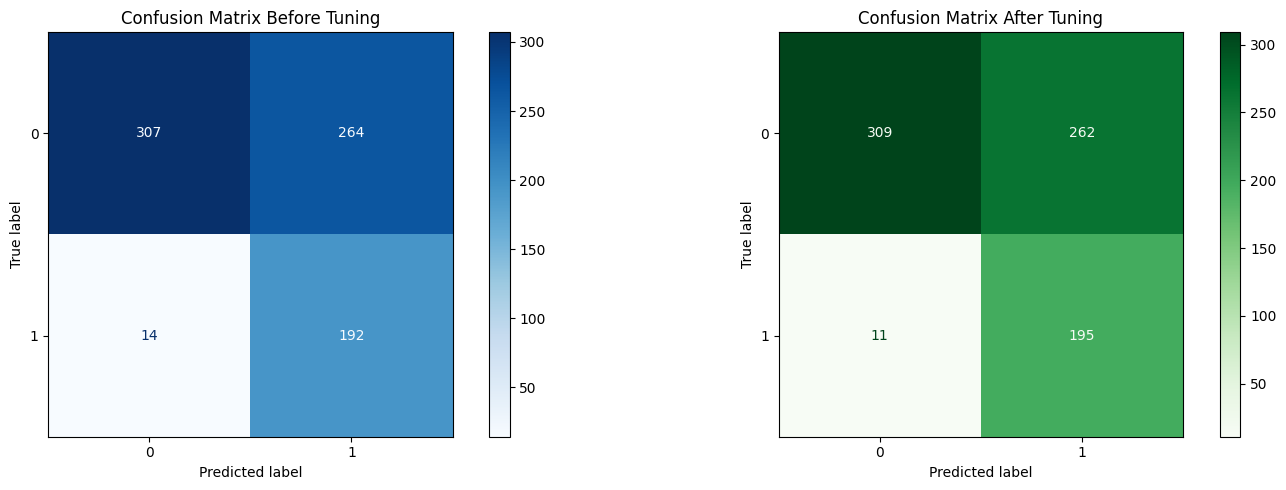

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix before tuning
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, cmap='Blues', ax=axs[0])
axs[0].set_title('Confusion Matrix Before Tuning')

# Confusion matrix after tuning
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap='Greens', ax=axs[1])
axs[1].set_title('Confusion Matrix After Tuning')

plt.tight_layout()
plt.show()

After tuning, there is a decrease in both the number of `false negatives` from 14 to 11 and `false positives` from 264 to 262. As `false negatives` are more detrimental to a company in the case of customer churn, the model after tuning gives the best result.

In [92]:
# Get values for TN, FP, FN, TP
conf_matrix = confusion_matrix(y_test, y_pred_best)
tn = conf_matrix[0, 0]
fp = conf_matrix[0,1]
fn = conf_matrix[1, 0]
tp = conf_matrix[1, 1]

**Summary of Confusion Matrix**
|Label | Description | Total |
| ---------- | -------------- | -- |
| True Positive | Customer predicted to churn and actually churns | 195
| True Negative | Customer predicted to not churn and actually not churn | 309
| False Positive | Customer predicted to churn but actually not churn | 262
| False Negative | Customer predicted to not chur but actually churns | 11

- ROC AUC Curve

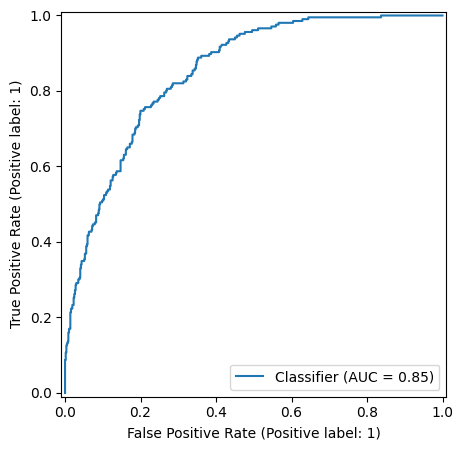

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
roc_disp = RocCurveDisplay.from_predictions(y_test, y_pred_proba_best, ax=ax)

- The ROC curve represents the performance of a binary classification model, and AUC (Area Under the Curve) is a measure of the model's ability to distinguish between classes.
- An AUC of 0.85 indicates a good performance, as it is closer to 1 (perfect classification) than 0 (random classification).

**7.7 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

In [94]:
best_model_features = best_model[0].get_feature_names_out()

list_features = []

for feature in best_model_features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Dependents_Yes',
 'OnlineSecurity_Yes',
 'OnlineBackup_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'DeviceProtection_Yes',
 'TechSupport_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'Tenure',
 'MonthlyCharges']

In [95]:
logistic_model = best_model.named_steps['model']
logistic_model.coef_

array([[-0.21681931, -0.83276255,  0.11380046,  2.02963211, -2.55763315,
         0.        , -0.25756103, -2.21616423, -3.8049437 ,  0.55751004,
        -3.5091629 ,  0.78875087]])

In [96]:
# Extract the coefficients
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': list_features,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

# Sort the features by absolute coefficient value
feature_importance = pd.DataFrame(feature_importance.sort_values(by='Absolute Coefficient', ascending=False))

feature_importance

,Feature,Coefficient,Absolute Coefficient
8,Contract_Two year,-3.804944,3.804944
10,Tenure,-3.509163,3.509163
4,InternetService_No,-2.557633,2.557633
7,Contract_One year,-2.216164,2.216164
3,InternetService_Fiber optic,2.029632,2.029632
1,OnlineSecurity_Yes,-0.832763,0.832763
11,MonthlyCharges,0.788751,0.788751
9,PaperlessBilling_Yes,0.557510,0.557510
6,TechSupport_Yes,-0.257561,0.257561
0,Dependents_Yes,-0.216819,0.216819


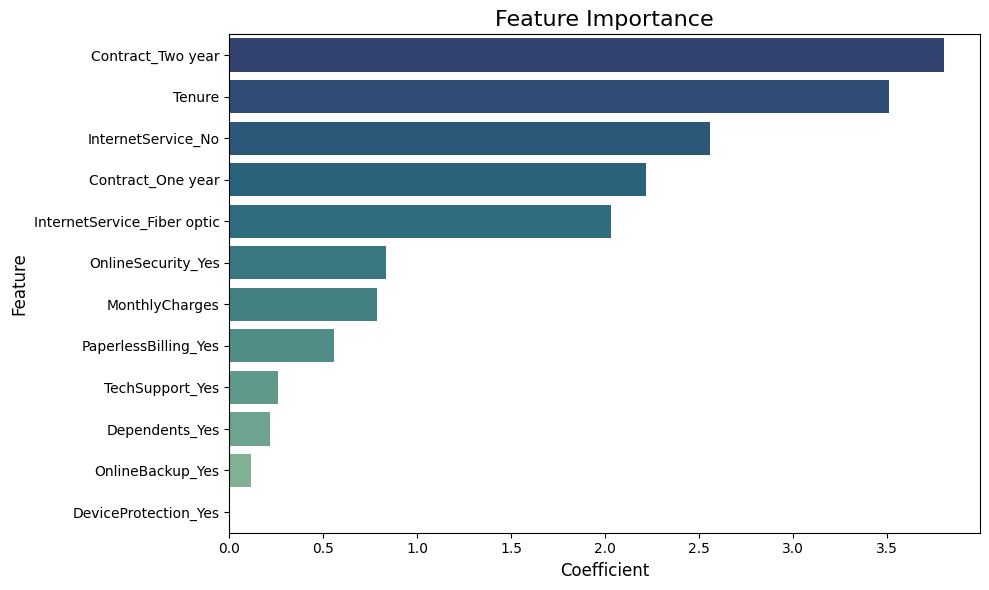

In [97]:
# Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance, 
    x='Absolute Coefficient', 
    y='Feature', 
    palette='crest_r'  
)

plt.title('Feature Importance', fontsize=16)
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

plt.show()

**Insights**

1. The features with the highest importance are `Contract_Two year` and `Tenure` with coefficient values above 3.5.
1. `DeviceProtection_Yes` is the feature with the lowest importance followed by `OnlineBackup_Yes`

- SHAP

In [98]:
X_train_preprocessed = best_model[0].transform(X_train)
X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=list_features)

X_test_preprocessed = best_model[0].transform(X_test)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=list_features)

PermutationExplainer explainer: 778it [00:21, 33.37it/s]                         


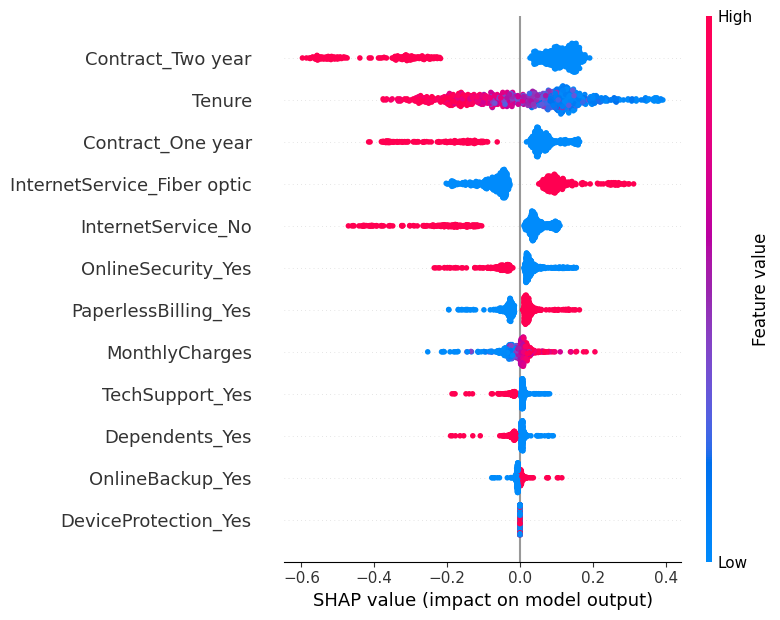

In [99]:
# Explainer
explainer = shap.Explainer(
    best_model[-1].predict,
    best_model[0].transform(X_test)
)

shap_values = explainer(X_test_preprocessed)
shap.summary_plot(shap_values, X_test_preprocessed)

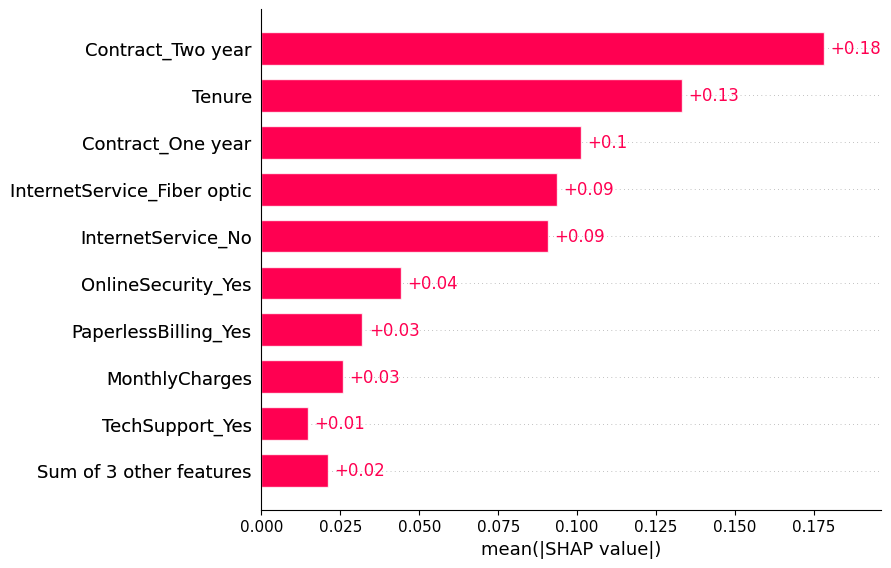

In [100]:
shap.plots.bar(shap_values)

- Counterfactual Analysis

Counterfactual analysis involves understanding how changes in input features can affect the outcome of a model. This is particularly useful in understanding model behavior and making decisions based on "what-if" scenarios.

Steps for Counterfactual Analysis:
1. **Train a Model**: Train a machine learning model on your dataset.
1. **Identify a Baseline Instance**: Select an instance from your dataset for which you want to perform the counterfactual analysis.
1. **Generate Counterfactuals**: Modify the features of the baseline instance to see how the changes affect the model's prediction.
1. **Evaluate the Impact**: Compare the original prediction with the new predictions after modifying the features.

In [104]:
# Select a baseline instance from the test set
baseline_instance = X_test.iloc[0]
baseline_instance_df = pd.DataFrame([baseline_instance])
print(f"""Baseline Instance:
{baseline_instance}""")

Baseline Instance:
Dependents          Yes     
Tenure              21      
OnlineSecurity      Yes     
OnlineBackup        No      
InternetService     DSL     
DeviceProtection    Yes     
TechSupport         No      
Contract            One year
PaperlessBilling    Yes     
MonthlyCharges      55.95   
Name: 0, dtype: object


In [124]:
# Create a copy of the baseline instance and modify some features
counterfactual_instance = baseline_instance.copy()
counterfactual_instance['Tenure'] = 12  # Example modification
counterfactual_instance['MonthlyCharges'] = 20  # Example modification
counterfactual_instance_df = pd.DataFrame([counterfactual_instance])
print(f"""Counterfactual Instance: 
{counterfactual_instance}""")

Counterfactual Instance: 
Dependents          Yes     
Tenure              12      
OnlineSecurity      Yes     
OnlineBackup        No      
InternetService     DSL     
DeviceProtection    Yes     
TechSupport         No      
Contract            One year
PaperlessBilling    Yes     
MonthlyCharges      20      
Name: 0, dtype: object


In [125]:
counterfactual_instance_df

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,12,Yes,No,DSL,Yes,No,One year,Yes,20


In [126]:
# Predict the outcome for the baseline instance
baseline_prediction = best_model.predict_proba(baseline_instance_df)[:, 1]
print("Baseline Prediction (Probability of Churn):", baseline_prediction)

# Predict the outcome for the counterfactual instance
counterfactual_prediction = best_model.predict_proba(counterfactual_instance_df)[:, 1]
print("Counterfactual Prediction (Probability of Churn):", counterfactual_prediction)

# Compare the predictions
print("Change in Prediction:", counterfactual_prediction - baseline_prediction)

Baseline Prediction (Probability of Churn): [0.36893364]
Counterfactual Prediction (Probability of Churn): [0.40561308]
Change in Prediction: [0.03667944]


The best model chosen suggests that probability of churn is affected more by months of tenure than the amount monthly charge

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)